<div style="font-family:'Times New Roman'; line-height:1.6;">

<div style="font-size:28px; font-weight:bold;">
Supply Chain Management – Exploratory Data Analysis
</div>

<div style="font-size:20px; margin-top:10px;">
Domain: Data Analyst
</div>

<div style="font-size:24px; font-style:italic; margin-top:12px;">
Objective
</div>

<div style="font-size:20px; margin-top:6px;">
The objective of this exploratory data analysis is to understand and evaluate
the supply chain operations of a fashion and beauty startup. The analysis focuses
on sales performance, inventory management, logistics, supplier efficiency, and
cost-related factors to derive meaningful business insights.
</div>

</div>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:
import matplotlib as mpl

mpl.rcParams["font.family"] = "Times New Roman"
mpl.rcParams["axes.titlesize"] = 28
mpl.rcParams["axes.labelsize"] = 20
mpl.rcParams["xtick.labelsize"] = 20
mpl.rcParams["ytick.labelsize"] = 16
mpl.rcParams["legend.fontsize"] = 16


<div style="font-family:'Times New Roman'; line-height:1.6;">

<div style="font-size:28px; font-weight:bold;">
Dataset Description
</div>

<div style="font-size:20px; margin-top:8px;">
The dataset used in this analysis contains supply chain information related to
products, sales, inventory levels, logistics, manufacturing, suppliers, and
transportation. It represents operational data from a fashion and beauty startup
and is suitable for exploratory and analytical evaluation.
</div>

</div>


In [2]:
df = pd.read_csv("D:\DATA PROJETS\Supply Chain Management Dashboard\DATASET/supply_chain_data.csv")
df.head()


,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


<div style="font-family:'Times New Roman'; line-height:1.6;">

<div style="font-size:28px; font-weight:bold;">
Dataset Overview
</div>

<div style="font-size:20px; margin-top:8px;">
This section provides a high-level overview of the dataset structure, including
the number of records, features, and data types. Understanding the dataset layout
helps in identifying numerical and categorical variables for further analysis.
</div>

</div>


In [3]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

<div style="font-family:'Times New Roman'; line-height:1.6;">

<div style="font-size:28px; font-weight:bold;">
Descriptive Statistics
</div>

<div style="font-size:20px; margin-top:8px;">
Descriptive statistics summarize the numerical features of the dataset using
measures such as mean, minimum, maximum, and standard deviation. This helps in
understanding data distribution, variability, and potential anomalies.
</div>

</div>


In [4]:
df.describe()


,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


<div style="font-family:'Times New Roman'; line-height:1.6;">

<div style="font-size:28px; font-weight:bold;">
Data Quality Check
</div>

<div style="font-size:20px; margin-top:8px;">
This step evaluates the dataset for missing values and duplicate records.
Ensuring clean and reliable data is essential before performing any exploratory
analysis or visualization.
</div>

</div>


In [5]:
df.isnull().sum()


Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

In [6]:
df.duplicated().sum()


np.int64(0)

<div style="font-family:'Times New Roman'; line-height:1.6;">

<div style="font-size:28px; font-weight:bold;">
Revenue Analysis
</div>

<div style="font-size:20px; margin-top:8px;">
This section analyzes the revenue generated across different locations in the
supply chain. Revenue analysis helps in assessing overall business performance
and identifying high-performing and low-performing markets.
</div>

</div>


In [7]:
df["Revenue generated"].sum()


np.float64(577604.8187380086)

### Revenue by Location

This analysis shows how revenue is distributed across different locations.
It helps in identifying regions with higher demand and better market
performance.


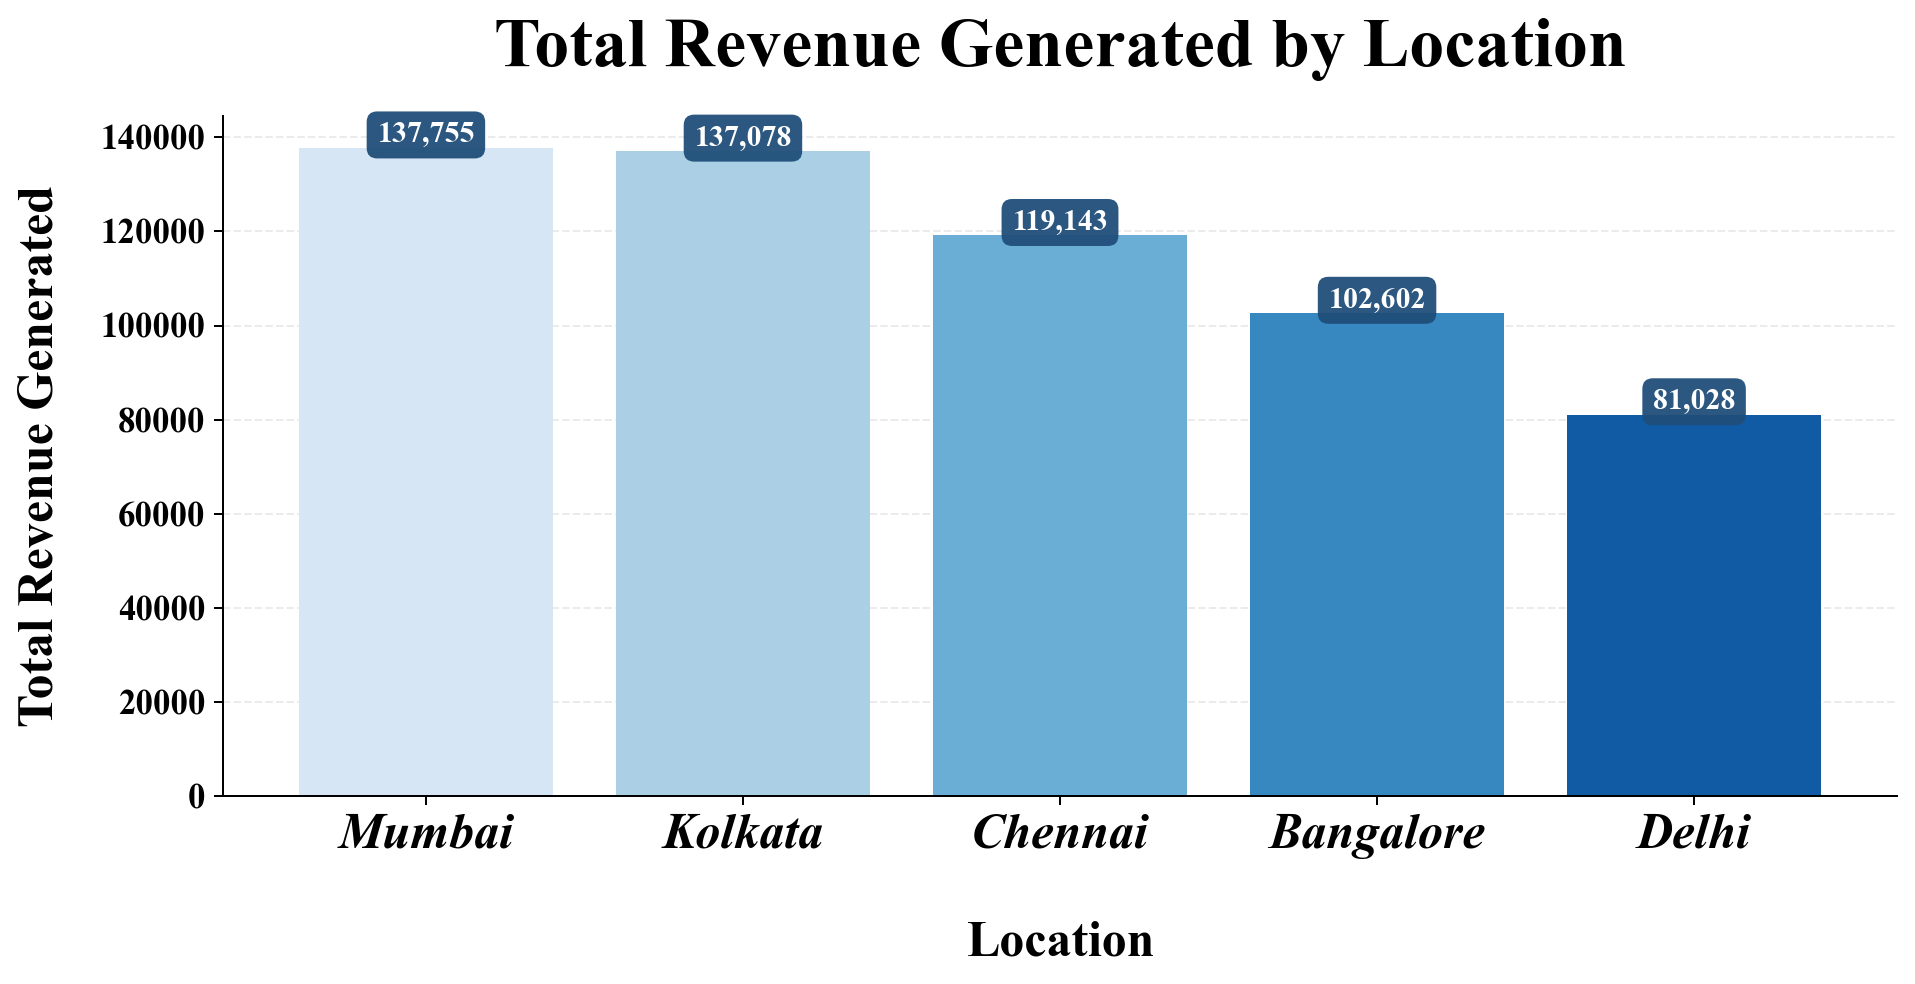

In [15]:
revenue_location = (
    df.groupby("Location", as_index=False)["Revenue generated"]
    .sum()
    .sort_values(by="Revenue generated", ascending=False)
)

plt.figure(figsize=(12,6), dpi=180)

bars = plt.bar(
    revenue_location["Location"],
    revenue_location["Revenue generated"],
    color=sns.color_palette("Blues", n_colors=len(revenue_location))
)

plt.title(
    "Total Revenue Generated by Location",
    fontweight="bold",
    pad=20
)

plt.xlabel(
    "Location",
    fontweight="bold",
    labelpad=25
)

plt.ylabel(
    "Total Revenue Generated",
    fontweight="bold",
    labelpad=15
)

plt.xticks(
    fontsize=20,
    fontweight="bold",
    style="italic"
)

plt.yticks(
    fontsize=14,
    fontweight="bold"
)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height:,.0f}",
        ha="center",
        va="bottom",
        fontsize=12,
        fontweight="bold",
        color="white",
        bbox=dict(
            facecolor="#1f4e79",
            edgecolor="none",
            boxstyle="round,pad=0.35",
            alpha=0.95
        )
    )

plt.grid(axis="y", linestyle="--", alpha=0.25)
plt.gca().set_axisbelow(True)

for spine in ["top", "right"]:
    plt.gca().spines[spine].set_visible(False)

plt.subplots_adjust(bottom=0.25)
import os

base_path = os.path.abspath("..")
output_dir = os.path.join(base_path, "output", "image")

os.makedirs(output_dir, exist_ok=True)

file_path = os.path.join(
    output_dir,
    "revenue_by_location.png"
)

plt.savefig(
    file_path,
    dpi=300,
    bbox_inches="tight",
    facecolor="white"
)

plt.show()

plt.show()


<div style="font-family:'Times New Roman'; line-height:1.6;">

<div style="font-size:24px; font-style:italic;">
Total Revenue Generated by Location
</div>

<div style="font-size:20px; margin-top:6px;">
This chart represents the total revenue generated across five major locations:
Mumbai, Kolkata, Chennai, Bangalore, and Delhi. Mumbai recorded the highest
revenue of approximately 137,755, followed closely by Kolkata with around 137,078.
Chennai generated moderate revenue of about 119,143, while Bangalore and Delhi
reported lower revenues of approximately 102,602 and 81,028 respectively.
</div>

<div style="font-size:20px; margin-top:6px;">
The analysis indicates that Mumbai and Kolkata are the strongest revenue-generating
locations and should be prioritized for inventory availability and expansion
strategies, whereas Delhi may require targeted business improvements.
</div>

</div>


<div style="font-family:'Times New Roman'; line-height:1.6;">

<div style="font-size:28px; font-weight:bold;">
Inventory Analysis
</div>

<div style="font-size:24px; font-style:italic; margin-top:8px;">
Stock Levels and Order Quantities
</div>

<div style="font-size:20px; margin-top:6px;">
This section examines the relationship between stock levels and order quantities
within the supply chain. The analysis helps in evaluating whether inventory levels
are aligned with customer demand and in identifying potential risks such as
overstocking or stock shortages.
</div>

</div>


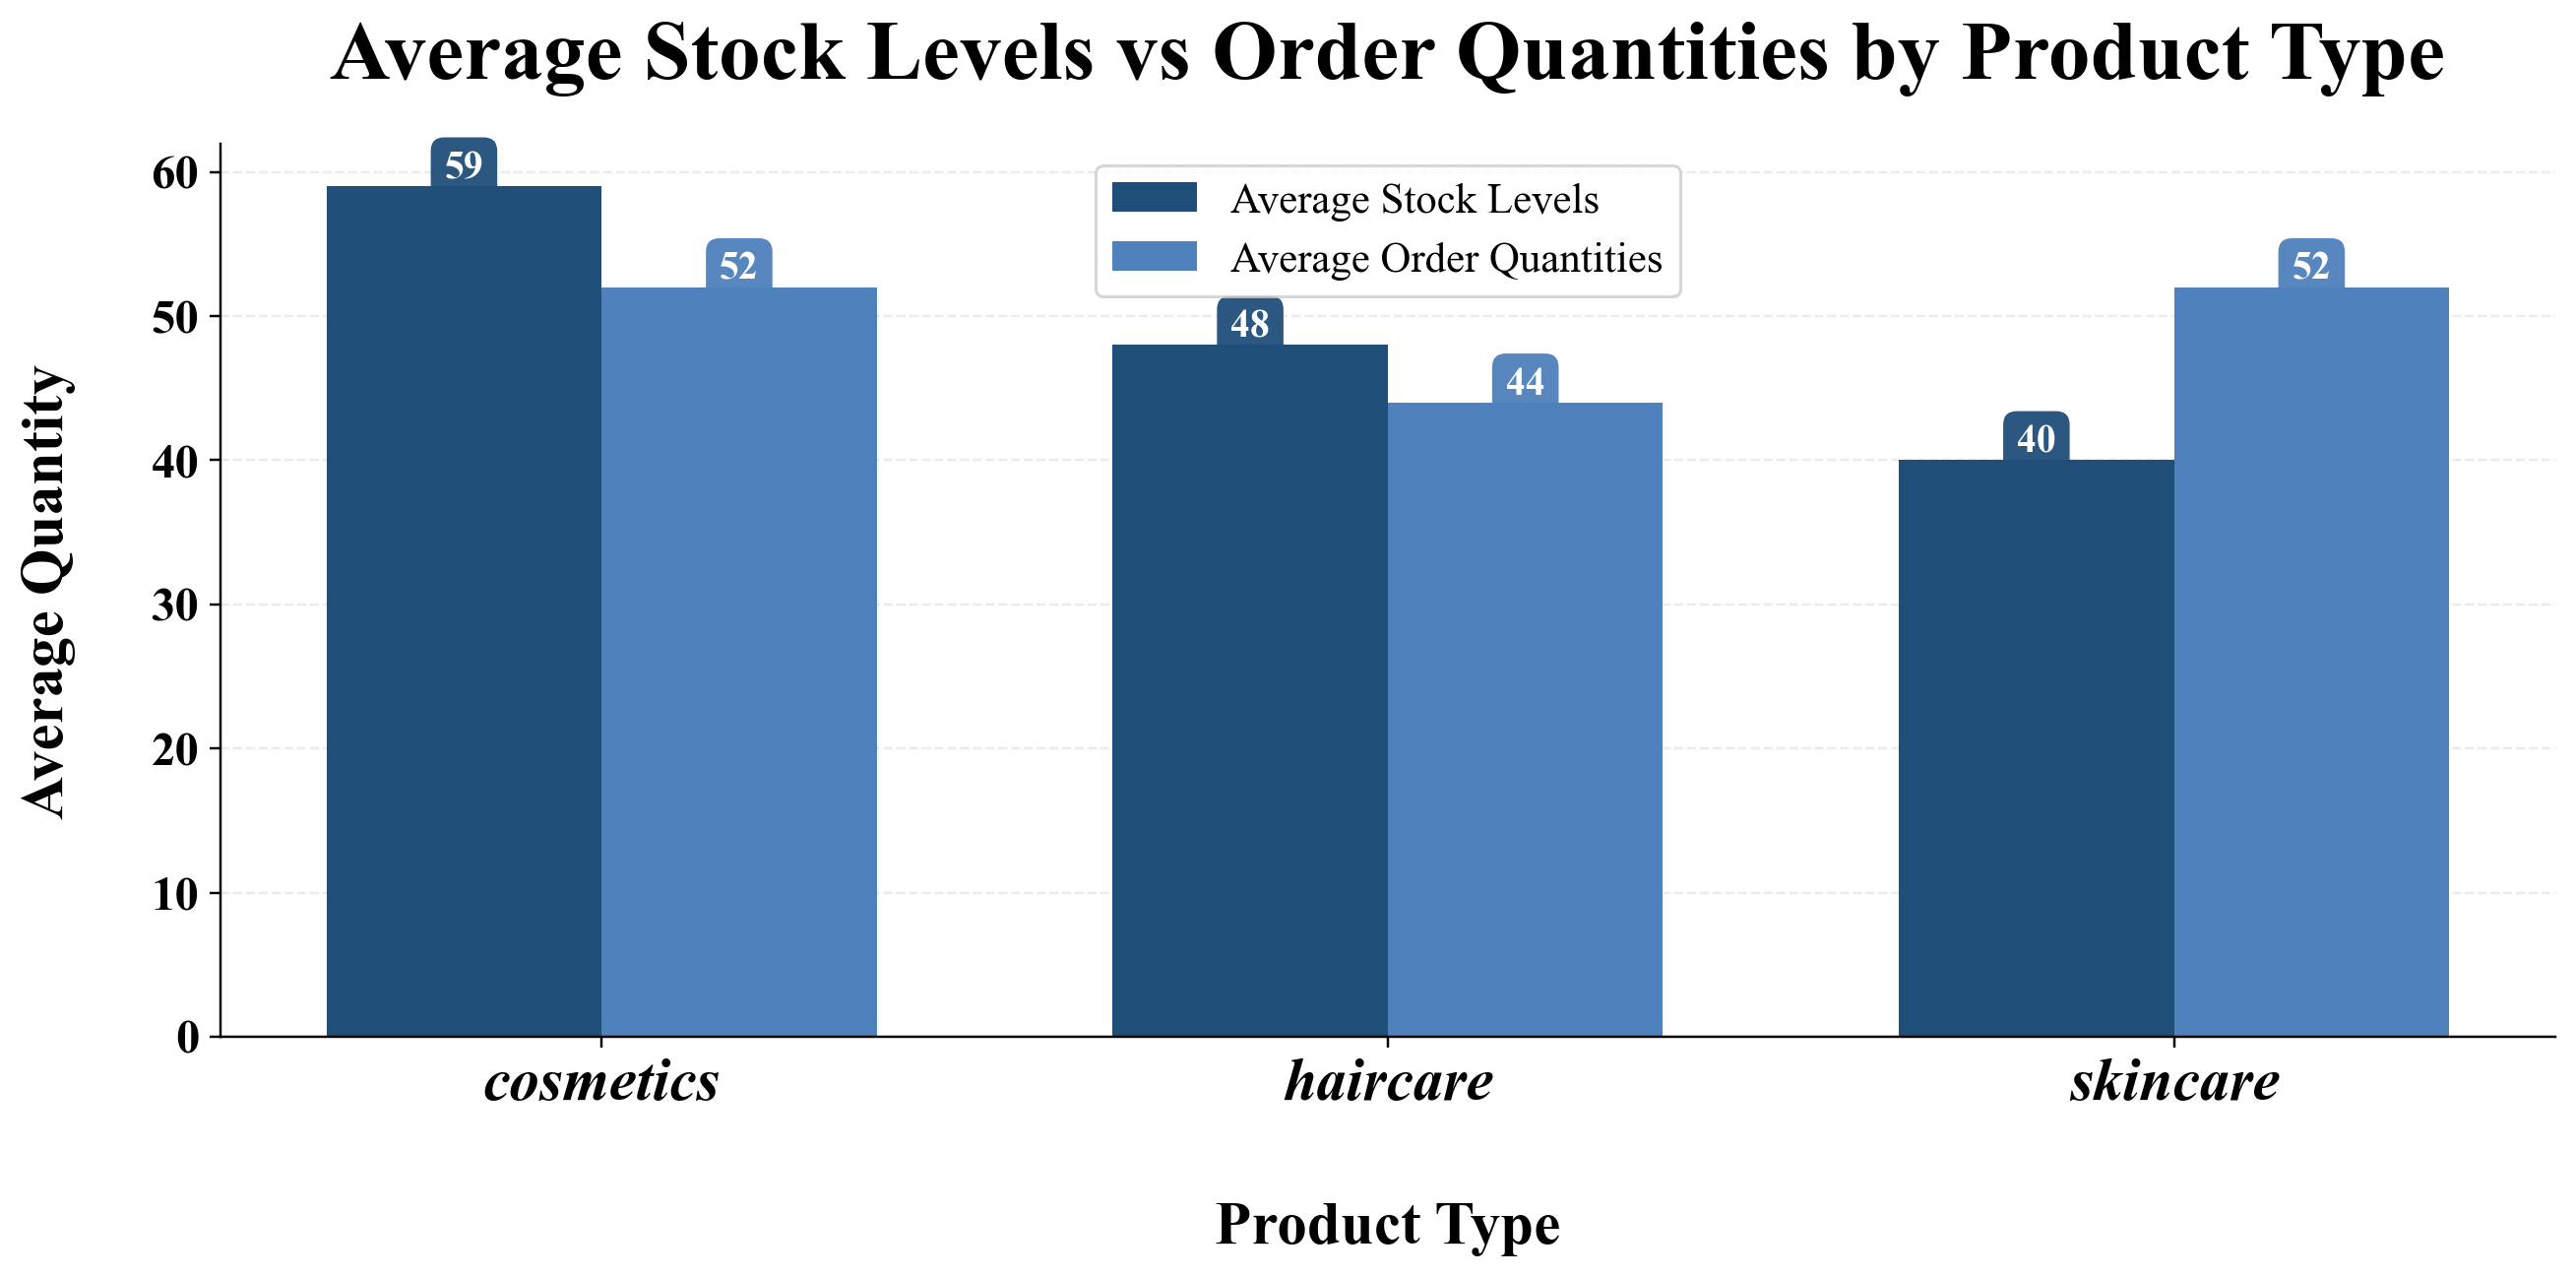

In [16]:
inventory_summary = (
    df.groupby("Product type", as_index=False)[
        ["Stock levels", "Order quantities"]
    ]
    .mean()
)

inventory_summary["Stock levels"] = inventory_summary["Stock levels"].round(0)
inventory_summary["Order quantities"] = inventory_summary["Order quantities"].round(0)

x = np.arange(len(inventory_summary))
width = 0.35

plt.figure(figsize=(12,6), dpi=220)

bars1 = plt.bar(
    x - width/2,
    inventory_summary["Stock levels"],
    width,
    label="Average Stock Levels",
    color="#1f4e79"
)

bars2 = plt.bar(
    x + width/2,
    inventory_summary["Order quantities"],
    width,
    label="Average Order Quantities",
    color="#4f81bd"
)

plt.title(
    "Average Stock Levels vs Order Quantities by Product Type",
    fontweight="bold",
    pad=22
)

plt.xlabel(
    "Product Type",
    fontsize=20,
    fontweight="bold",
    labelpad=30
)

plt.ylabel(
    "Average Quantity",
    fontsize=20,
    fontweight="bold",
    labelpad=25
)

plt.xticks(
    x,
    inventory_summary["Product type"],
    fontsize=20,
    fontweight="bold",
    style="italic"
)

plt.yticks(
    fontsize=16,
    fontweight="bold"
)

for bar in bars1:
    height = int(bar.get_height())
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height}",
        ha="center",
        va="bottom",
        fontsize=13,
        fontweight="bold",
        color="white",
        bbox=dict(
            facecolor="#1f4e79",
            edgecolor="none",
            boxstyle="round,pad=0.35",
            alpha=0.95
        )
    )

for bar in bars2:
    height = int(bar.get_height())
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height}",
        ha="center",
        va="bottom",
        fontsize=13,
        fontweight="bold",
        color="white",
        bbox=dict(
            facecolor="#4f81bd",
            edgecolor="none",
            boxstyle="round,pad=0.35",
            alpha=0.95
        )
    )

plt.legend(fontsize=14)

plt.grid(axis="y", linestyle="--", alpha=0.25)
plt.gca().set_axisbelow(True)

for spine in ["top", "right"]:
    plt.gca().spines[spine].set_visible(False)

plt.tight_layout()
import os

base_path = os.path.abspath("..")
output_dir = os.path.join(base_path, "output", "image")

os.makedirs(output_dir, exist_ok=True)

file_path = os.path.join(
    output_dir,
    "inventory_stock_vs_order_by_product_type.png"
)

plt.savefig(
    file_path,
    dpi=300,
    bbox_inches="tight",
    facecolor="white"
)

plt.show()



<div style="font-family:'Times New Roman'; line-height:1.8;">

<div style="font-size:24px; font-style:italic; margin-bottom:12px;">
Average Stock Levels vs Order Quantities by Product Type
</div>

<div style="font-size:20px; margin-left:30px; margin-bottom:10px;">
This chart compares the average stock levels and average order quantities
across different product types in the supply chain. It helps in understanding
whether inventory availability is aligned with customer demand at a category
level.
</div>

<div style="font-size:20px; margin-left:30px; margin-bottom:10px;">
The analysis shows that for most product types, average stock levels are slightly
higher than average order quantities. This indicates that inventory planning is
generally balanced and sufficient to meet customer demand.
</div>

<div style="font-size:20px; margin-left:30px; margin-bottom:10px;">
In certain product categories, the difference between stock levels and order
quantities is relatively small. Such categories require closer monitoring to
avoid potential stock shortages during demand fluctuations.
</div>

<div style="font-size:20px; margin-left:30px;">
Overall, the chart suggests that inventory management at the product type level
is effective, but continuous demand forecasting and periodic stock adjustments
are necessary to maintain supply chain efficiency.
</div>

</div>


<div style="font-family:'Times New Roman'; line-height:1.8;">

<div style="font-size:28px; font-weight:bold;">
Shipping Cost Analysis
</div>

<div style="font-size:24px; font-style:italic; margin-top:10px;">
Average Shipping Cost by Carrier
</div>

<div style="font-size:20px; margin-top:10px;">
This section analyzes the average shipping cost associated with each shipping
carrier. The objective is to identify cost differences among carriers and
determine which carrier provides more economical shipping services within
the supply chain.
</div>

</div>


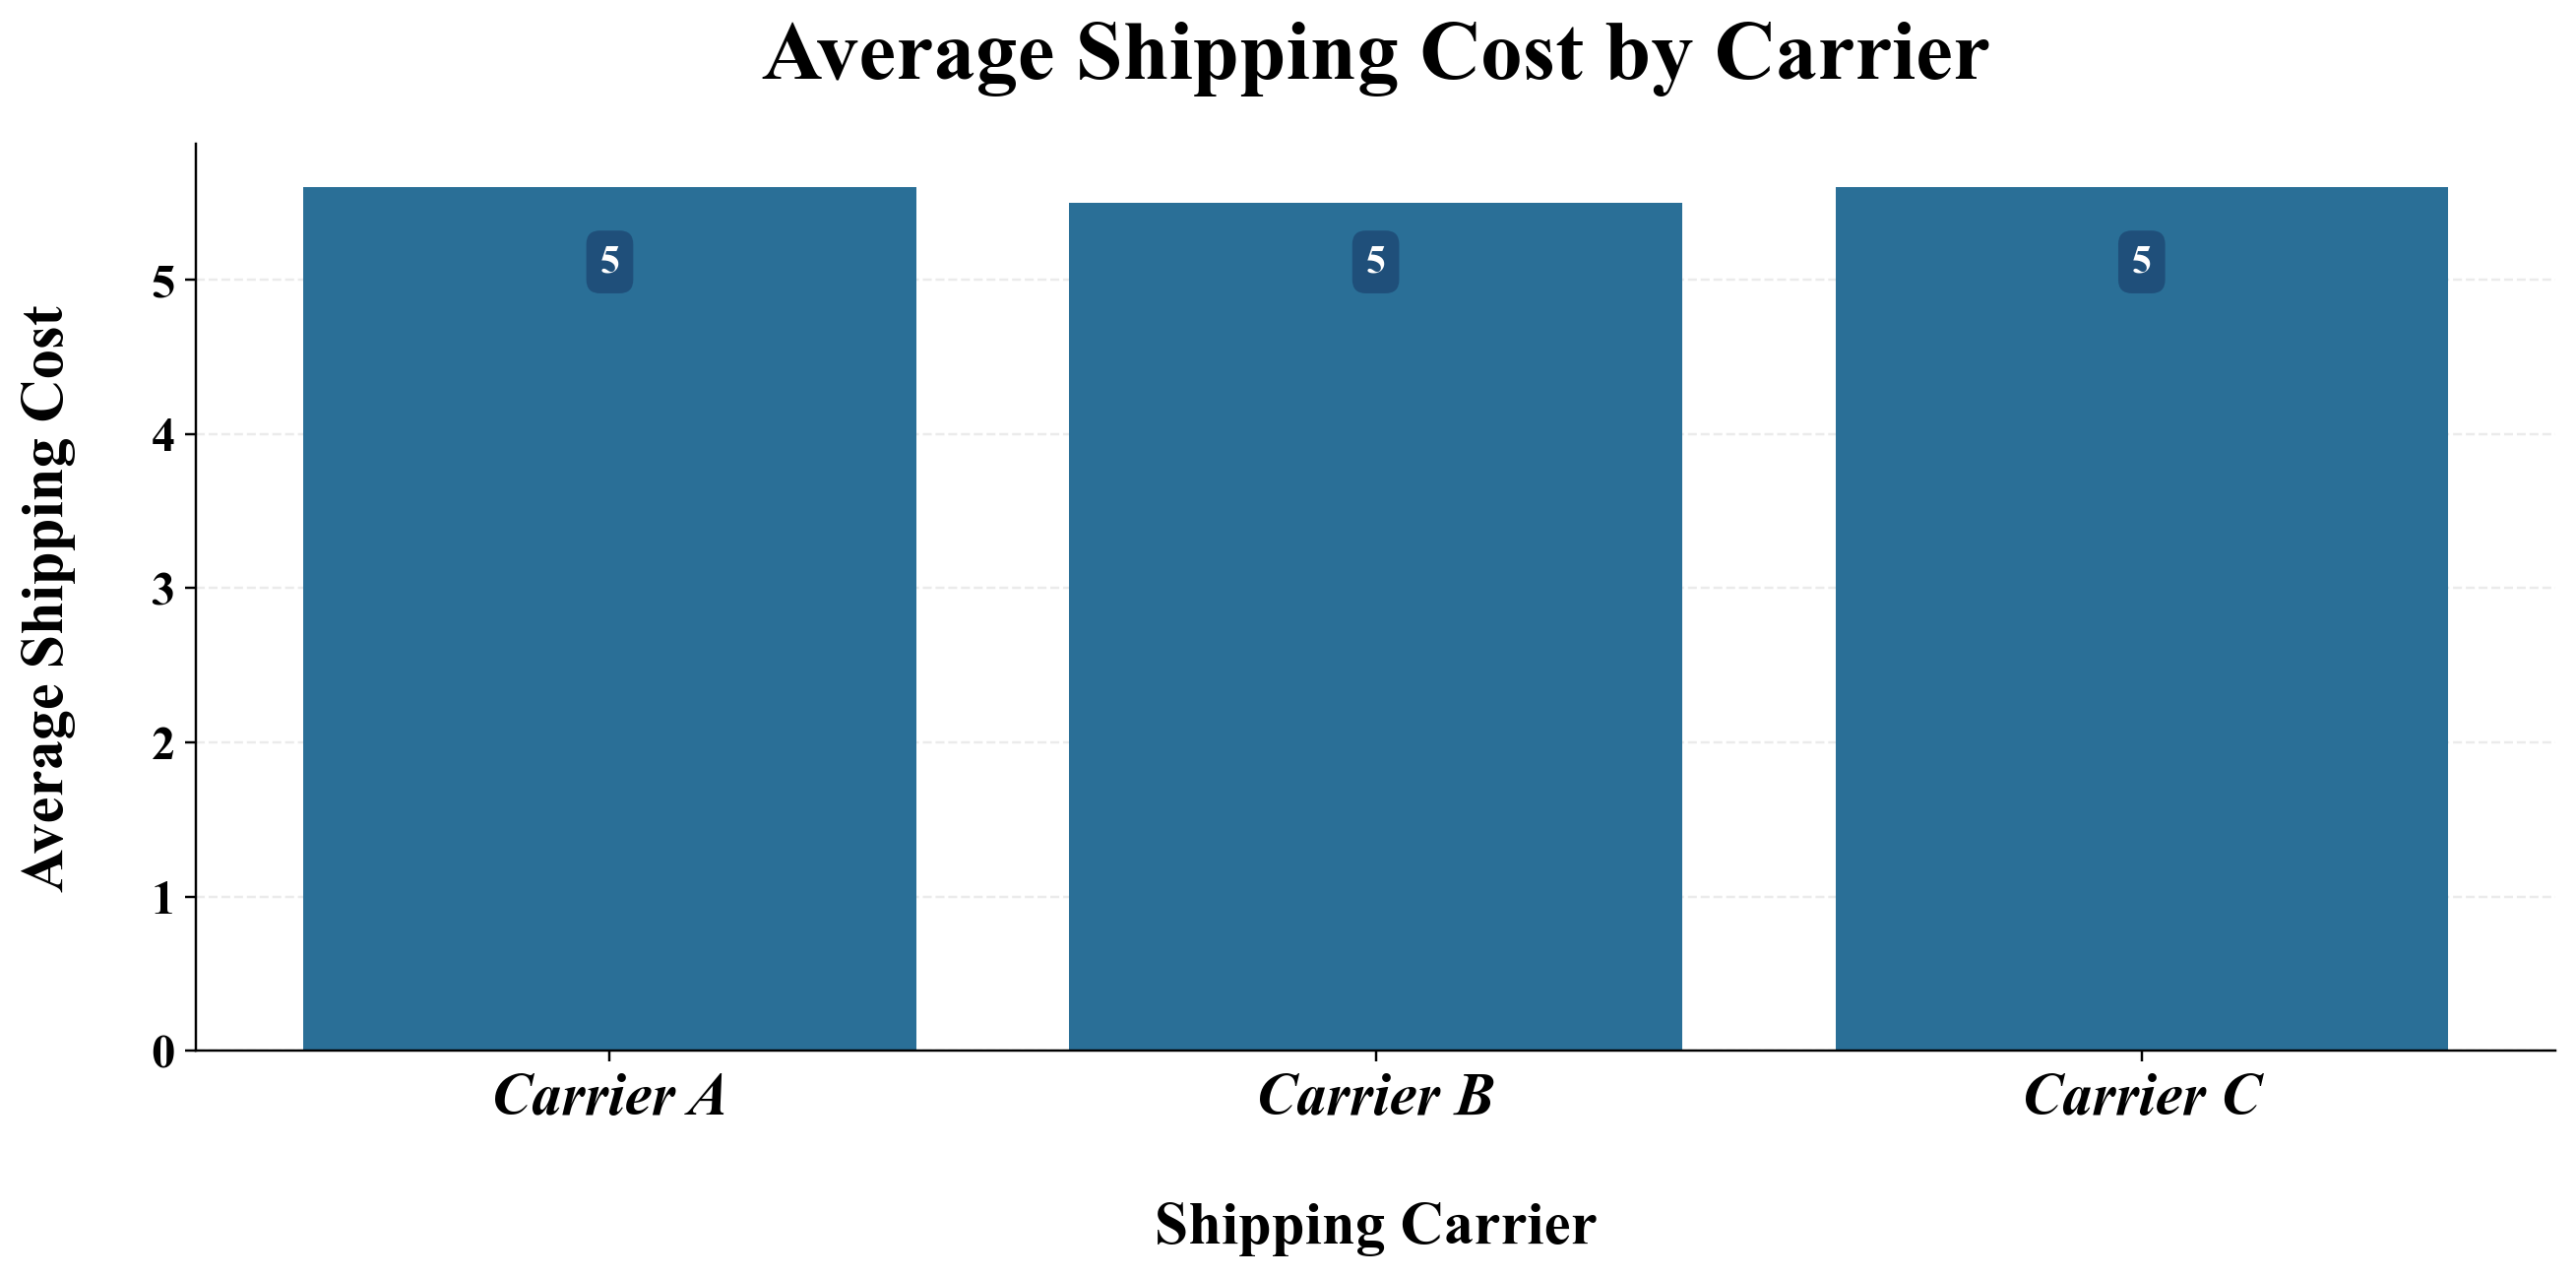

In [20]:
shipping_summary = (
    df.groupby("Shipping carriers", as_index=False)["Shipping costs"]
    .mean()
)

shipping_summary["Shipping costs"] = shipping_summary["Shipping costs"].round(1)

plt.figure(figsize=(12,6), dpi=220)

bars = plt.bar(
    shipping_summary["Shipping carriers"],
    shipping_summary["Shipping costs"],
    color="#2a6f97"
)

plt.title(
    "Average Shipping Cost by Carrier",
    fontweight="bold",
    pad=22
)

plt.xlabel(
    "Shipping Carrier",
    fontsize=20,
    fontweight="bold",
    labelpad=25
)

plt.ylabel(
    "Average Shipping Cost",
    fontsize=20,
    fontweight="bold",
    labelpad=25
)

plt.xticks(
    fontsize=20,
    fontweight="bold",
    style="italic"
)

plt.yticks(
    fontsize=16,
    fontweight="bold"
)

for bar in bars:
    height = int(bar.get_height())
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height}",
        ha="center",
        va="bottom",
        fontsize=13,
        fontweight="bold",
        color="white",
        bbox=dict(
            facecolor="#1f4e79",
            edgecolor="none",
            boxstyle="round,pad=0.35",
            alpha=0.95
        )
    )

plt.grid(axis="y", linestyle="--", alpha=0.25)
plt.gca().set_axisbelow(True)

for spine in ["top", "right"]:
    plt.gca().spines[spine].set_visible(False)

plt.tight_layout()
import os

base_path = os.path.abspath("..")
output_dir = os.path.join(base_path, "output", "image")

os.makedirs(output_dir, exist_ok=True)

file_path = os.path.join(
    output_dir,
    "shipping_cost_by_carrier.png"
)

plt.savefig(
    file_path,
    dpi=300,
    bbox_inches="tight",
    facecolor="white"
)

plt.show()



<div style="font-family:'Times New Roman'; line-height:1.8;">

<div style="font-size:28px; font-weight:bold;">
Shipping Cost Distribution
</div>

<div style="font-size:24px; font-style:italic; margin-top:10px;">
Distribution of Shipping Costs by Carrier
</div>

<div style="font-size:20px; margin-top:10px;">
This section analyzes the distribution of shipping costs for each carrier.
While average values provide a general overview, distribution analysis helps
in understanding cost variability, consistency, and the presence of outliers.
</div>

</div>





C:\Users\Vishwas Gurav\AppData\Local\Temp\ipykernel_22692\361740979.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


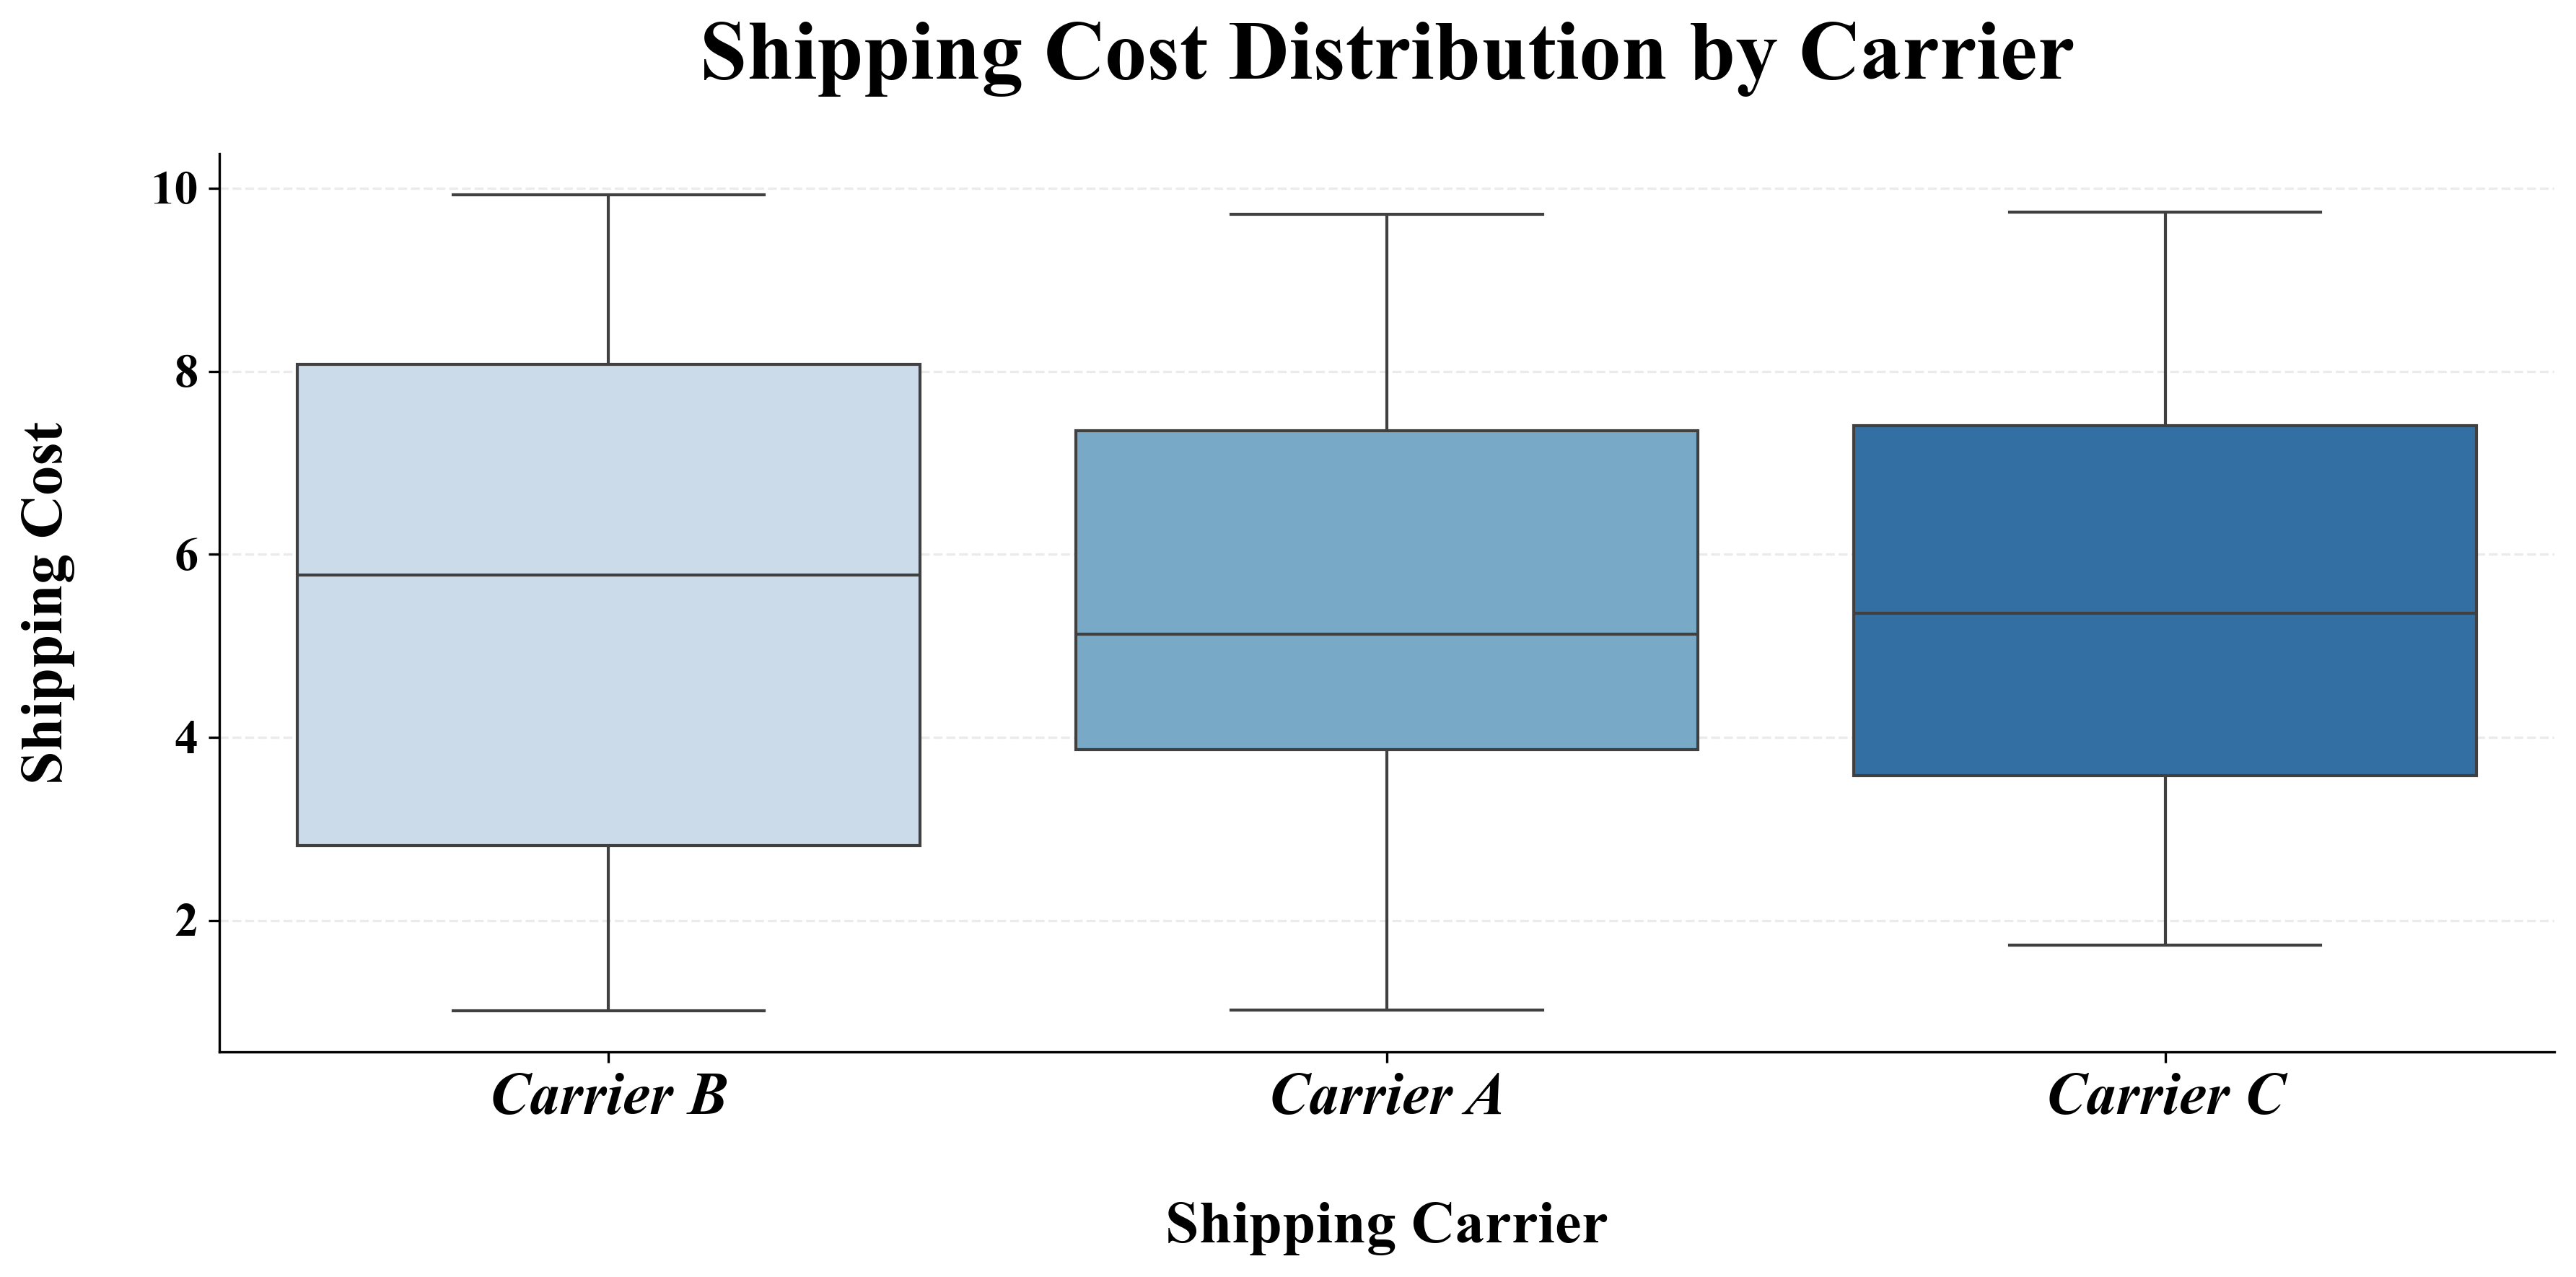

In [22]:
plt.figure(figsize=(12,6), dpi=300)

sns.boxplot(
    data=df,
    x="Shipping carriers",
    y="Shipping costs",
    palette="Blues"
)

plt.title(
    "Shipping Cost Distribution by Carrier",
    fontweight="bold",
    pad=25
)

plt.xlabel(
    "Shipping Carrier",
    fontweight="bold",
    labelpad=25
)

plt.ylabel(
    "Shipping Cost",
    fontweight="bold",
    labelpad=25
)

plt.xticks(fontweight="bold", style="italic")
plt.yticks(fontweight="bold")

plt.grid(axis="y", linestyle="--", alpha=0.25)
plt.gca().set_axisbelow(True)

for spine in ["top", "right"]:
    plt.gca().spines[spine].set_visible(False)

plt.tight_layout()
plt.show()


<div style="font-family:'Times New Roman'; line-height:1.8;">

<div style="font-size:24px; font-style:italic; margin-bottom:12px;">
Shipping Cost Distribution by Carrier
</div>

<div style="font-size:20px; margin-left:30px; margin-bottom:10px;">
This boxplot represents the distribution of shipping costs for each carrier.
Unlike average analysis, this visualization highlights cost variability,
median values, and potential outliers.
</div>

<div style="font-size:20px; margin-left:30px; margin-bottom:10px;">
The median shipping cost for all three carriers appears relatively similar,
indicating minimal cost difference at the central tendency level.
However, the spread of the box and whiskers helps identify whether
any carrier has higher cost fluctuations.
</div>

<div style="font-size:20px; margin-left:30px;">
If cost variability is low across all carriers, it suggests stable pricing.
If one carrier shows a wider range, it may indicate inconsistent shipping
charges depending on shipment type or route.
</div>

</div>


<div style="font-family:'Times New Roman'; line-height:1.8;">

<div style="font-size:28px; font-weight:bold;">
Manufacturing Cost Analysis
</div>

<div style="font-size:24px; font-style:italic; margin-top:10px;">
Average Manufacturing Cost by Supplier
</div>

<div style="font-size:20px; margin-top:10px;">
This section evaluates the average manufacturing cost associated with each supplier.
The objective is to compare supplier cost efficiency and identify potential
opportunities for cost optimization within the supply chain.
</div>

</div>


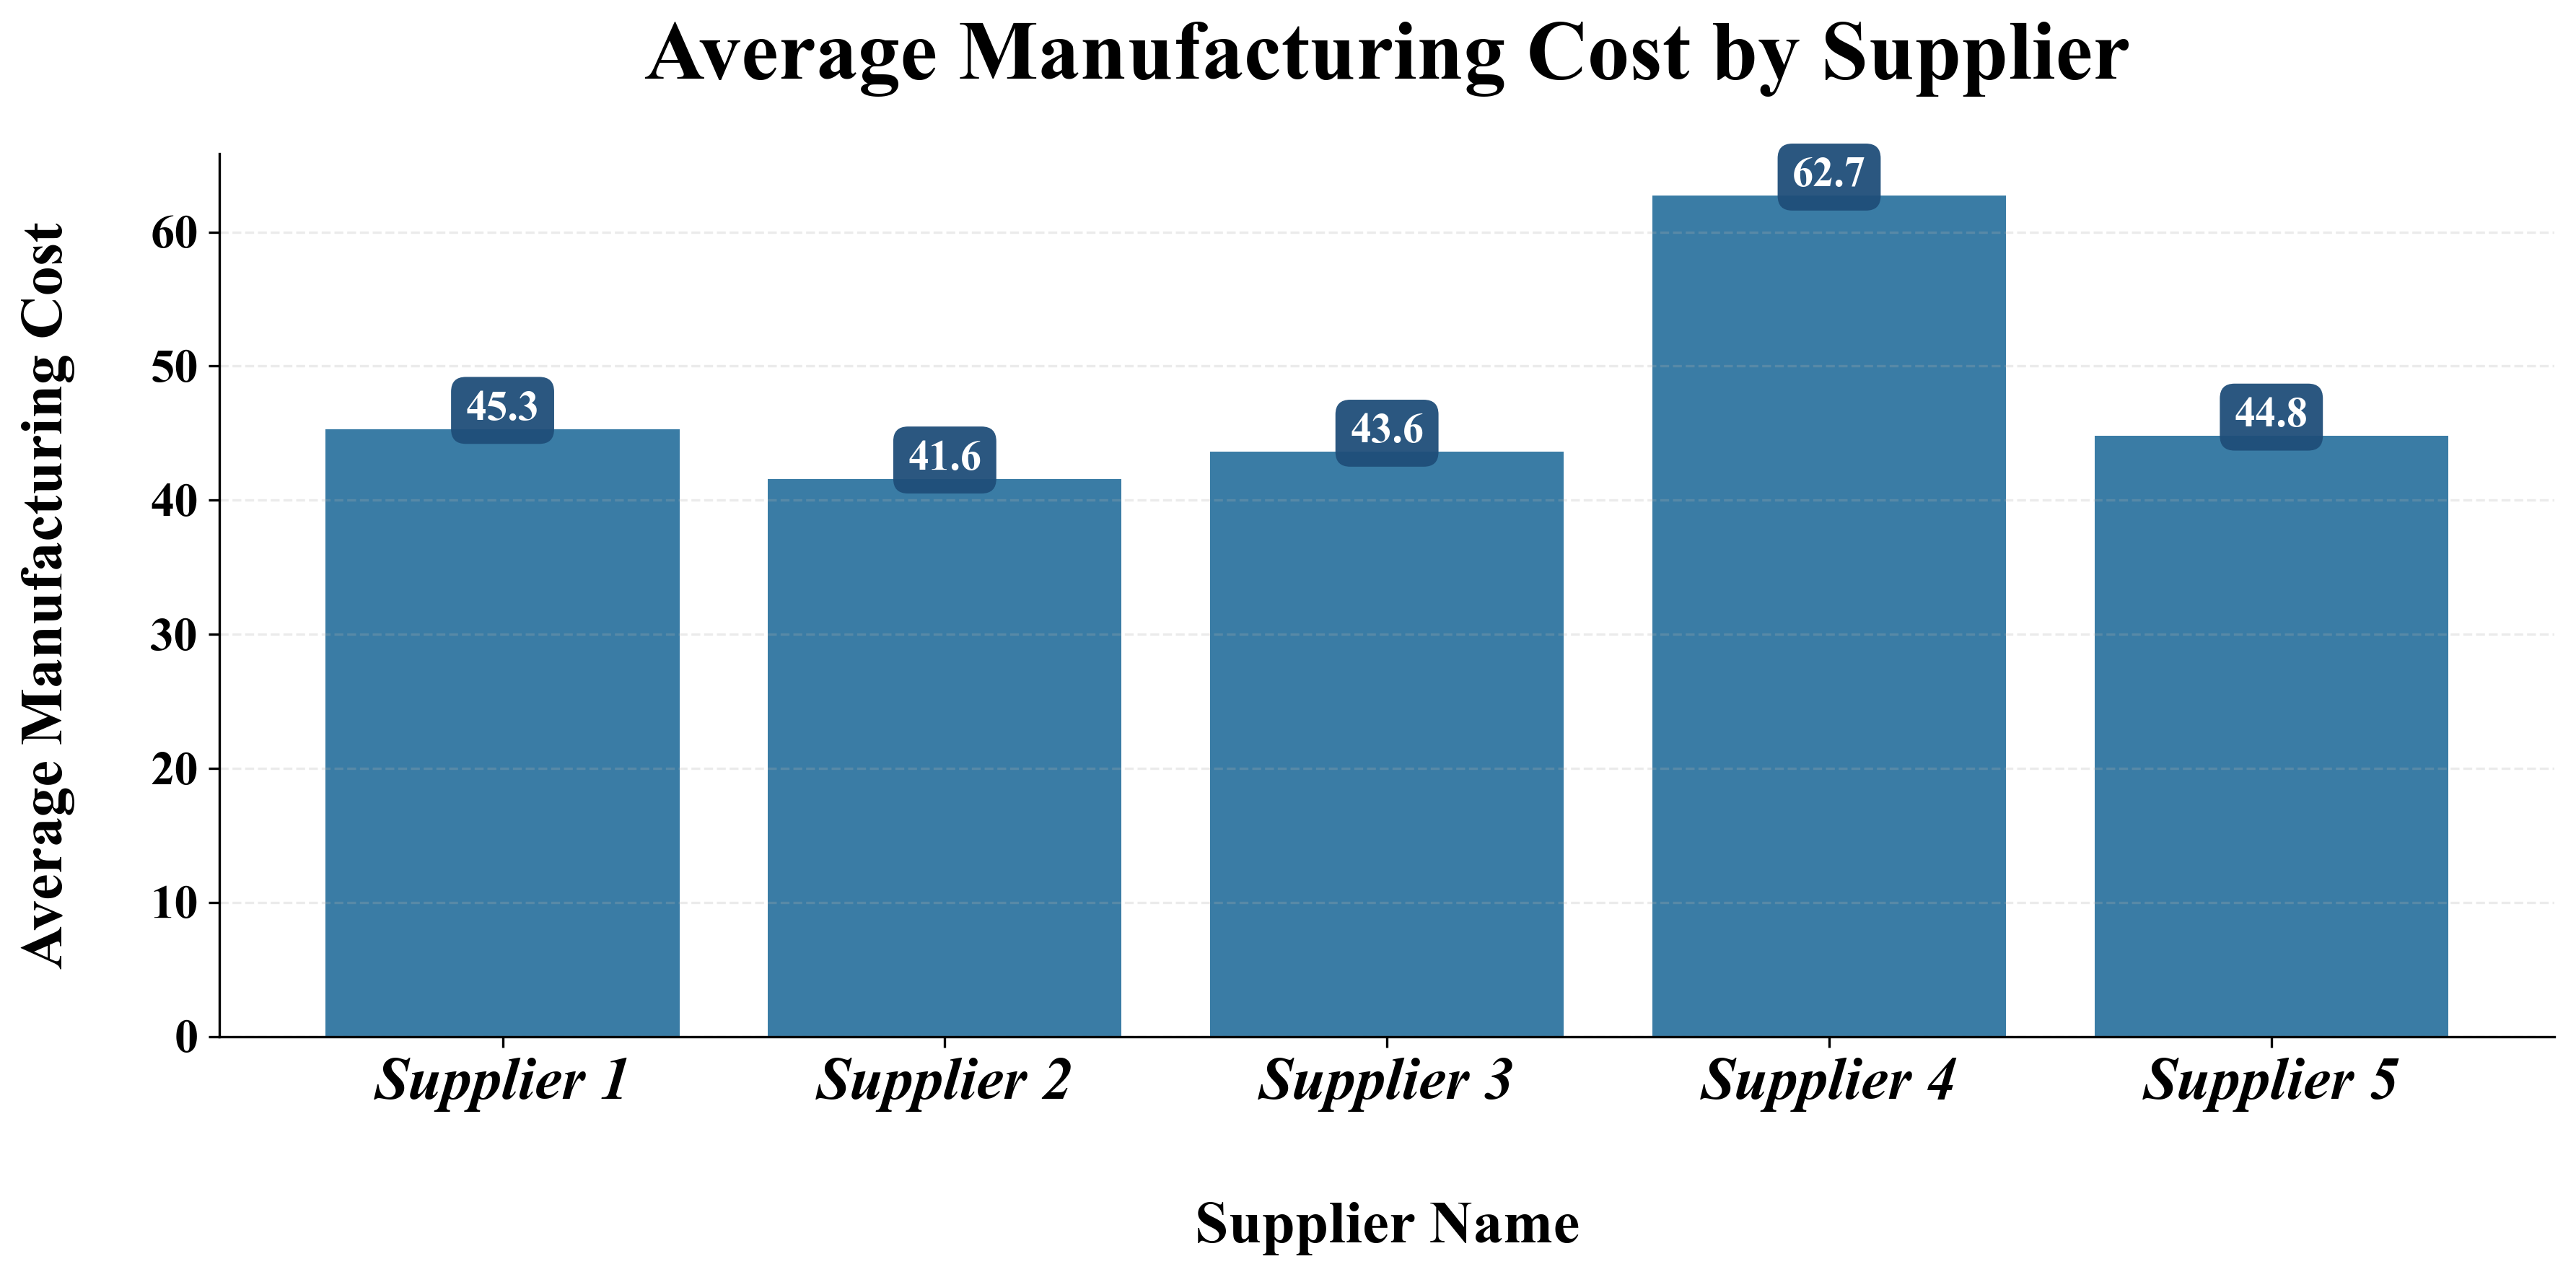

In [26]:
supplier_summary = (
    df.groupby("Supplier name", as_index=False)["Manufacturing costs"]
    .mean()
)

supplier_summary["Manufacturing costs"] = supplier_summary["Manufacturing costs"].round(1)

plt.figure(figsize=(12,6), dpi=300)

bars = plt.bar(
    supplier_summary["Supplier name"],
    supplier_summary["Manufacturing costs"],
    color="#3a7ca5"
)

plt.title(
    "Average Manufacturing Cost by Supplier",
    fontweight="bold",
    pad=25
)

plt.xlabel(
    "Supplier Name",
    fontweight="bold",
    labelpad=30
)

plt.ylabel(
    "Average Manufacturing Cost",
    fontweight="bold",
    labelpad=25
)

plt.xticks(fontweight="bold", style="italic")
plt.yticks(fontweight="bold")

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height}",
        ha="center",
        va="bottom",
        fontsize=14,
        fontweight="bold",
        color="white",
        bbox=dict(
            facecolor="#1f4e79",
            edgecolor="none",
            boxstyle="round,pad=0.35",
            alpha=0.95
        )
    )

plt.grid(axis="y", linestyle="--", alpha=0.25)

for spine in ["top", "right"]:
    plt.gca().spines[spine].set_visible(False)

plt.tight_layout()
import os

base_path = os.path.abspath("..")
output_dir = os.path.join(base_path, "output", "image")

os.makedirs(output_dir, exist_ok=True)

file_path = os.path.join(
    output_dir,
    "manufacturing_cost_by_supplier.png"
)

plt.savefig(
    file_path,
    dpi=300,
    bbox_inches="tight",
    facecolor="white"
)

plt.show()


<div style="font-family:'Times New Roman'; line-height:1.8;">

<div style="font-size:24px; font-style:italic; margin-bottom:12px;">
Average Manufacturing Cost by Supplier
</div>

<div style="font-size:20px; margin-left:30px; margin-bottom:10px;">
This chart compares the average manufacturing cost associated with each
supplier in the supply chain. The objective is to evaluate supplier cost
efficiency and identify potential cost optimization opportunities.
</div>

<div style="font-size:20px; margin-left:30px; margin-bottom:10px;">
The analysis indicates that there are noticeable differences in average
manufacturing costs across suppliers. Some suppliers operate at relatively
lower average costs, while others exhibit higher cost levels, which may
impact overall profitability.
</div>

<div style="font-size:20px; margin-left:30px; margin-bottom:10px;">
Suppliers with lower average manufacturing costs can be considered more
cost-efficient; however, cost should not be evaluated in isolation.
Other factors such as product quality, defect rates, and lead times must
also be considered before making supplier selection decisions.
</div>

<div style="font-size:20px; margin-left:30px;">
Overall, this analysis supports strategic supplier evaluation and helps
identify opportunities for cost reduction and supply chain optimization.
</div>

</div>


<div style="font-family:'Times New Roman'; line-height:1.8;">

<div style="font-size:28px; font-weight:bold;">
Lead Time Analysis
</div>

<div style="font-size:24px; font-style:italic; margin-top:10px;">
Average Lead Time by Product Type
</div>

<div style="font-size:20px; margin-top:10px;">
This section evaluates the average lead time across different product types.
Lead time represents the duration between order placement and product availability.
Analyzing lead time helps improve inventory planning and supply chain responsiveness.
</div>

</div>


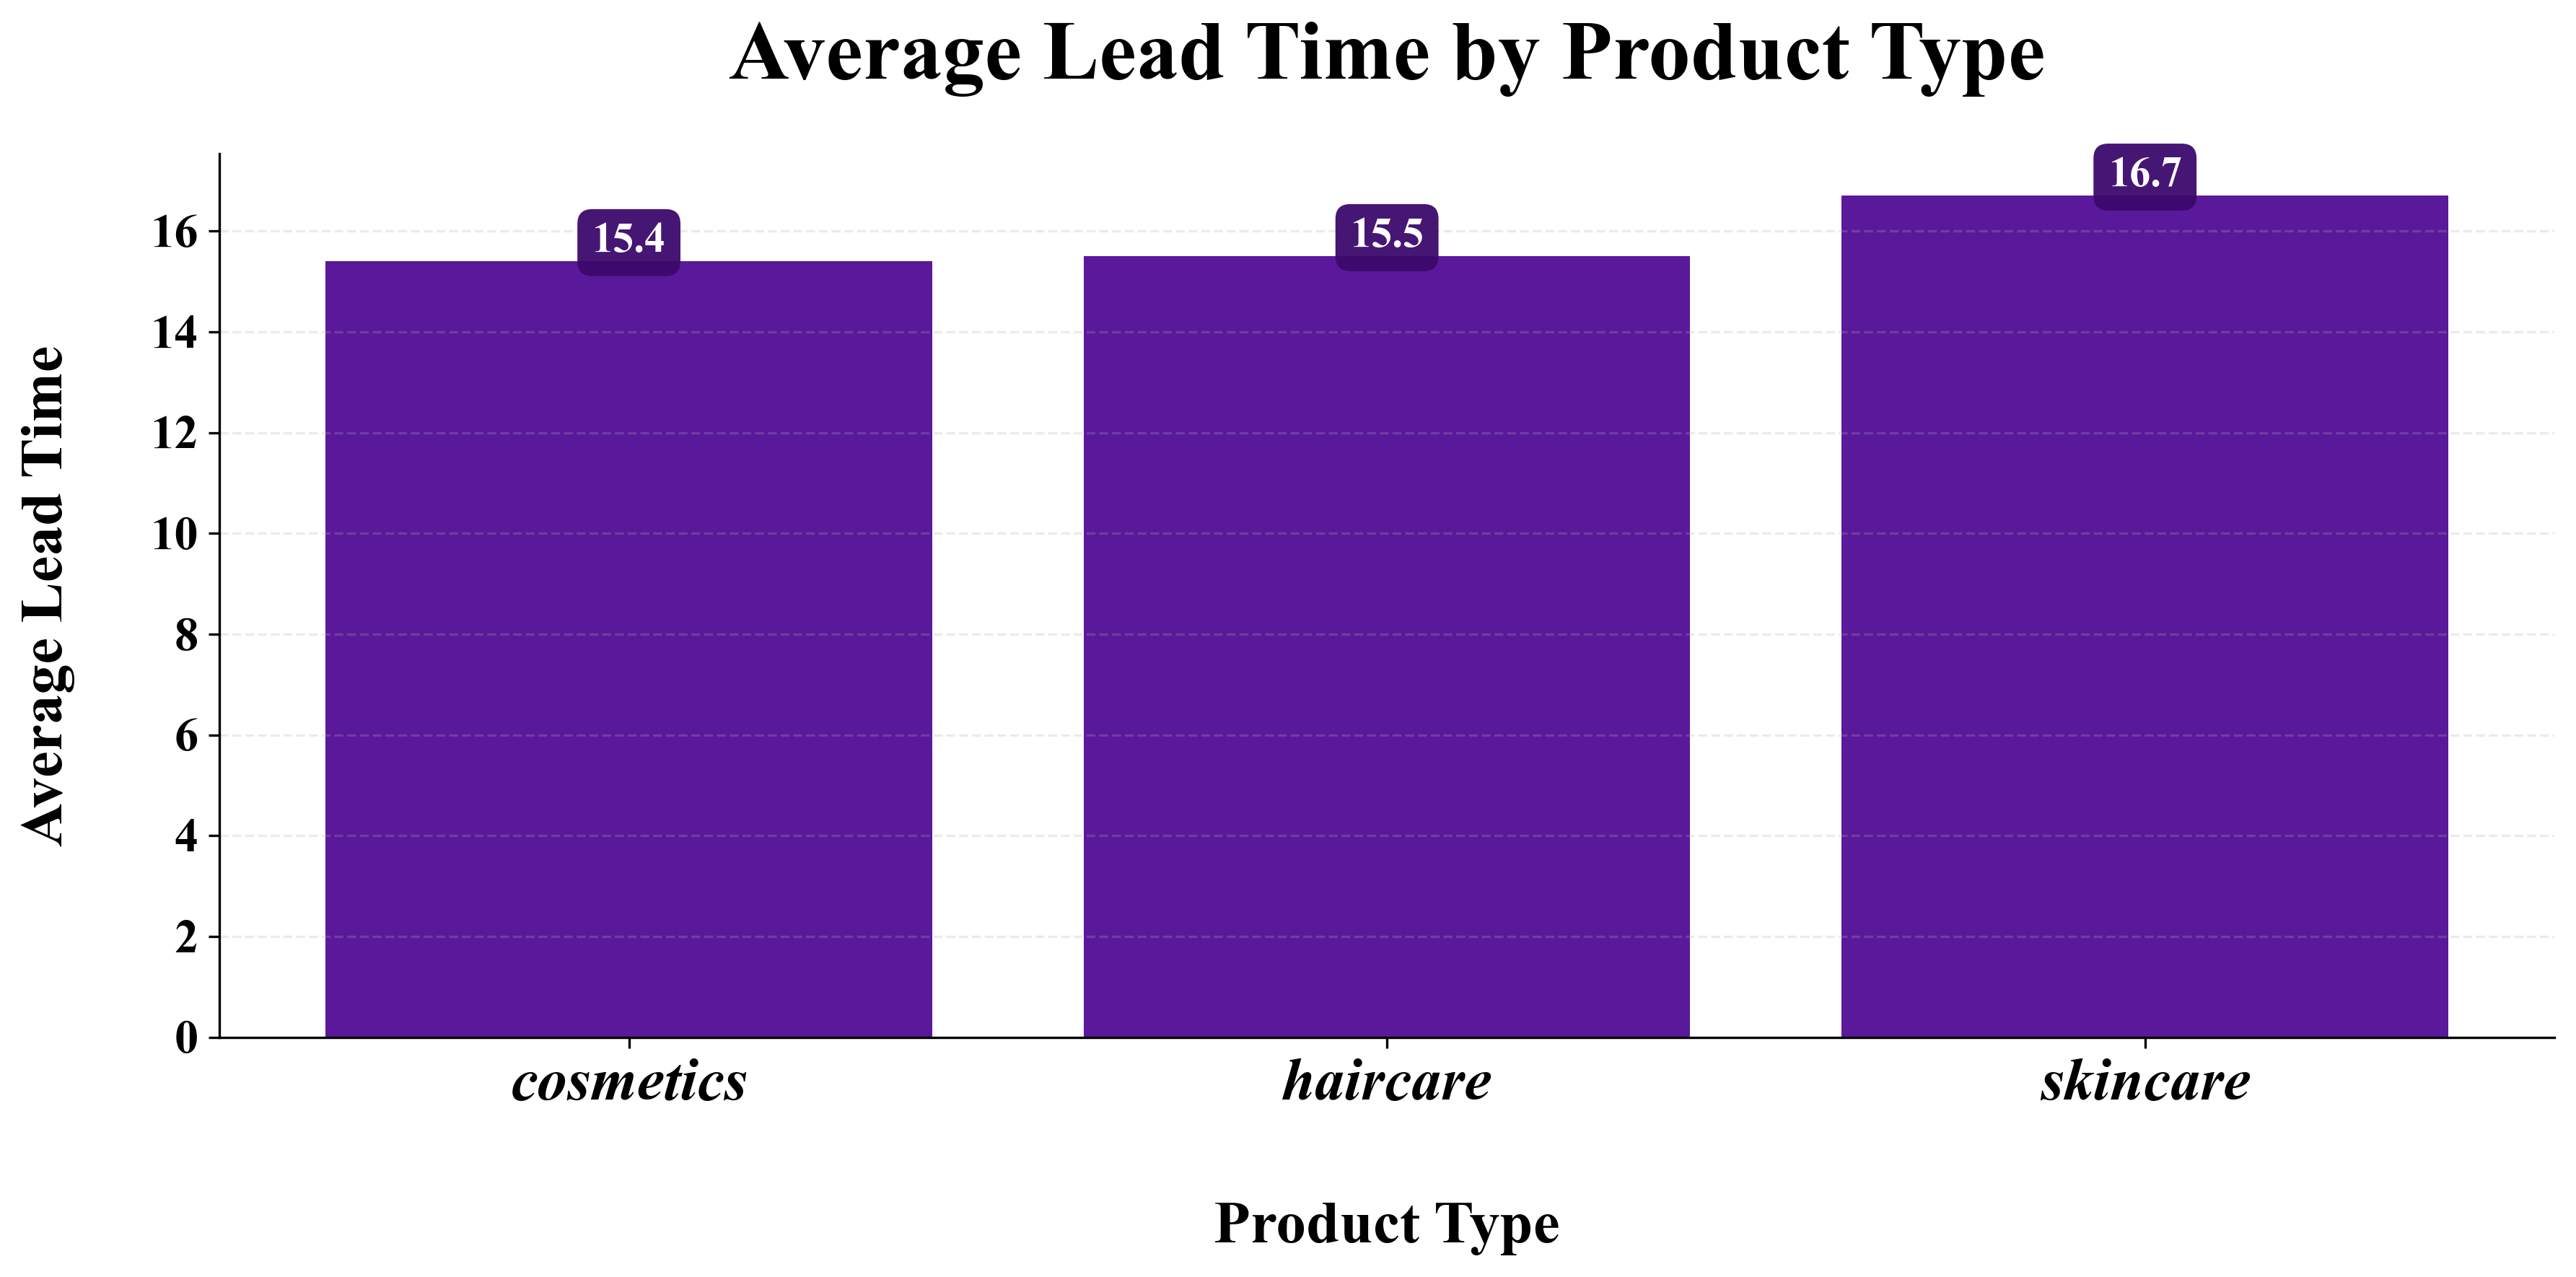

In [30]:
lead_time_summary = (
    df.groupby("Product type", as_index=False)["Lead times"]
    .mean()
)

# rounding values for better presentation clarity
lead_time_summary["Lead times"] = lead_time_summary["Lead times"].round(1)

plt.figure(figsize=(12,6), dpi=300)

bars = plt.bar(
    lead_time_summary["Product type"],
    lead_time_summary["Lead times"],
    color="#5a189a"
)

# setting title clearly
plt.title(
    "Average Lead Time by Product Type",
    fontweight="bold",
    pad=25
)

# labeling axes for proper interpretation
plt.xlabel(
    "Product Type",
    fontweight="bold",
    labelpad=30
)

plt.ylabel(
    "Average Lead Time",
    fontweight="bold",
    labelpad=25
)

plt.xticks(fontweight="bold", style="italic")
plt.yticks(fontweight="bold")

# adding values on top of bars for readability
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height}",
        ha="center",
        va="bottom",
        fontsize=14,
        fontweight="bold",
        color="white",
        bbox=dict(
            facecolor="#3c096c",
            edgecolor="none",
            boxstyle="round,pad=0.35",
            alpha=0.95
        )
    )

plt.grid(axis="y", linestyle="--", alpha=0.25)

for spine in ["top", "right"]:
    plt.gca().spines[spine].set_visible(False)

plt.tight_layout()
import os

base_path = os.path.abspath("..")
output_dir = os.path.join(base_path, "output", "image")

os.makedirs(output_dir, exist_ok=True)

file_path = os.path.join(
    output_dir,
    "lead_time_by_product_type.png"
)

plt.savefig(
    file_path,
    dpi=300,
    bbox_inches="tight",
    facecolor="white"
)

plt.show()


<div style="font-family:'Times New Roman'; line-height:1.8;">

<div style="font-size:24px; font-style:italic; margin-bottom:12px;">
Average Lead Time by Product Type
</div>

<div style="font-size:20px; margin-left:30px; margin-bottom:10px;">
This chart compares the average lead time across different product types.
Lead time indicates the time required from order placement to product availability.
</div>

<div style="font-size:20px; margin-left:30px; margin-bottom:10px;">
The analysis shows variation in lead times among product categories.
Some product types require longer production or procurement cycles,
which may increase inventory holding requirements.
</div>

<div style="font-size:20px; margin-left:30px;">
Product categories with higher lead times require more accurate demand forecasting
and safety stock planning to avoid stockouts and supply disruptions.
</div>

</div>


<div style="font-family:'Times New Roman'; line-height:1.8;">

<div style="font-size:28px; font-weight:bold;">
Defect Rate Analysis
</div>

<div style="font-size:24px; font-style:italic; margin-top:10px;">
Average Defect Rate by Supplier
</div>

<div style="font-size:20px; margin-top:10px;">
This section analyzes the average defect rate associated with each supplier.
Defect rate reflects product quality performance and helps identify suppliers
that may require quality control improvements or monitoring.
</div>

</div>


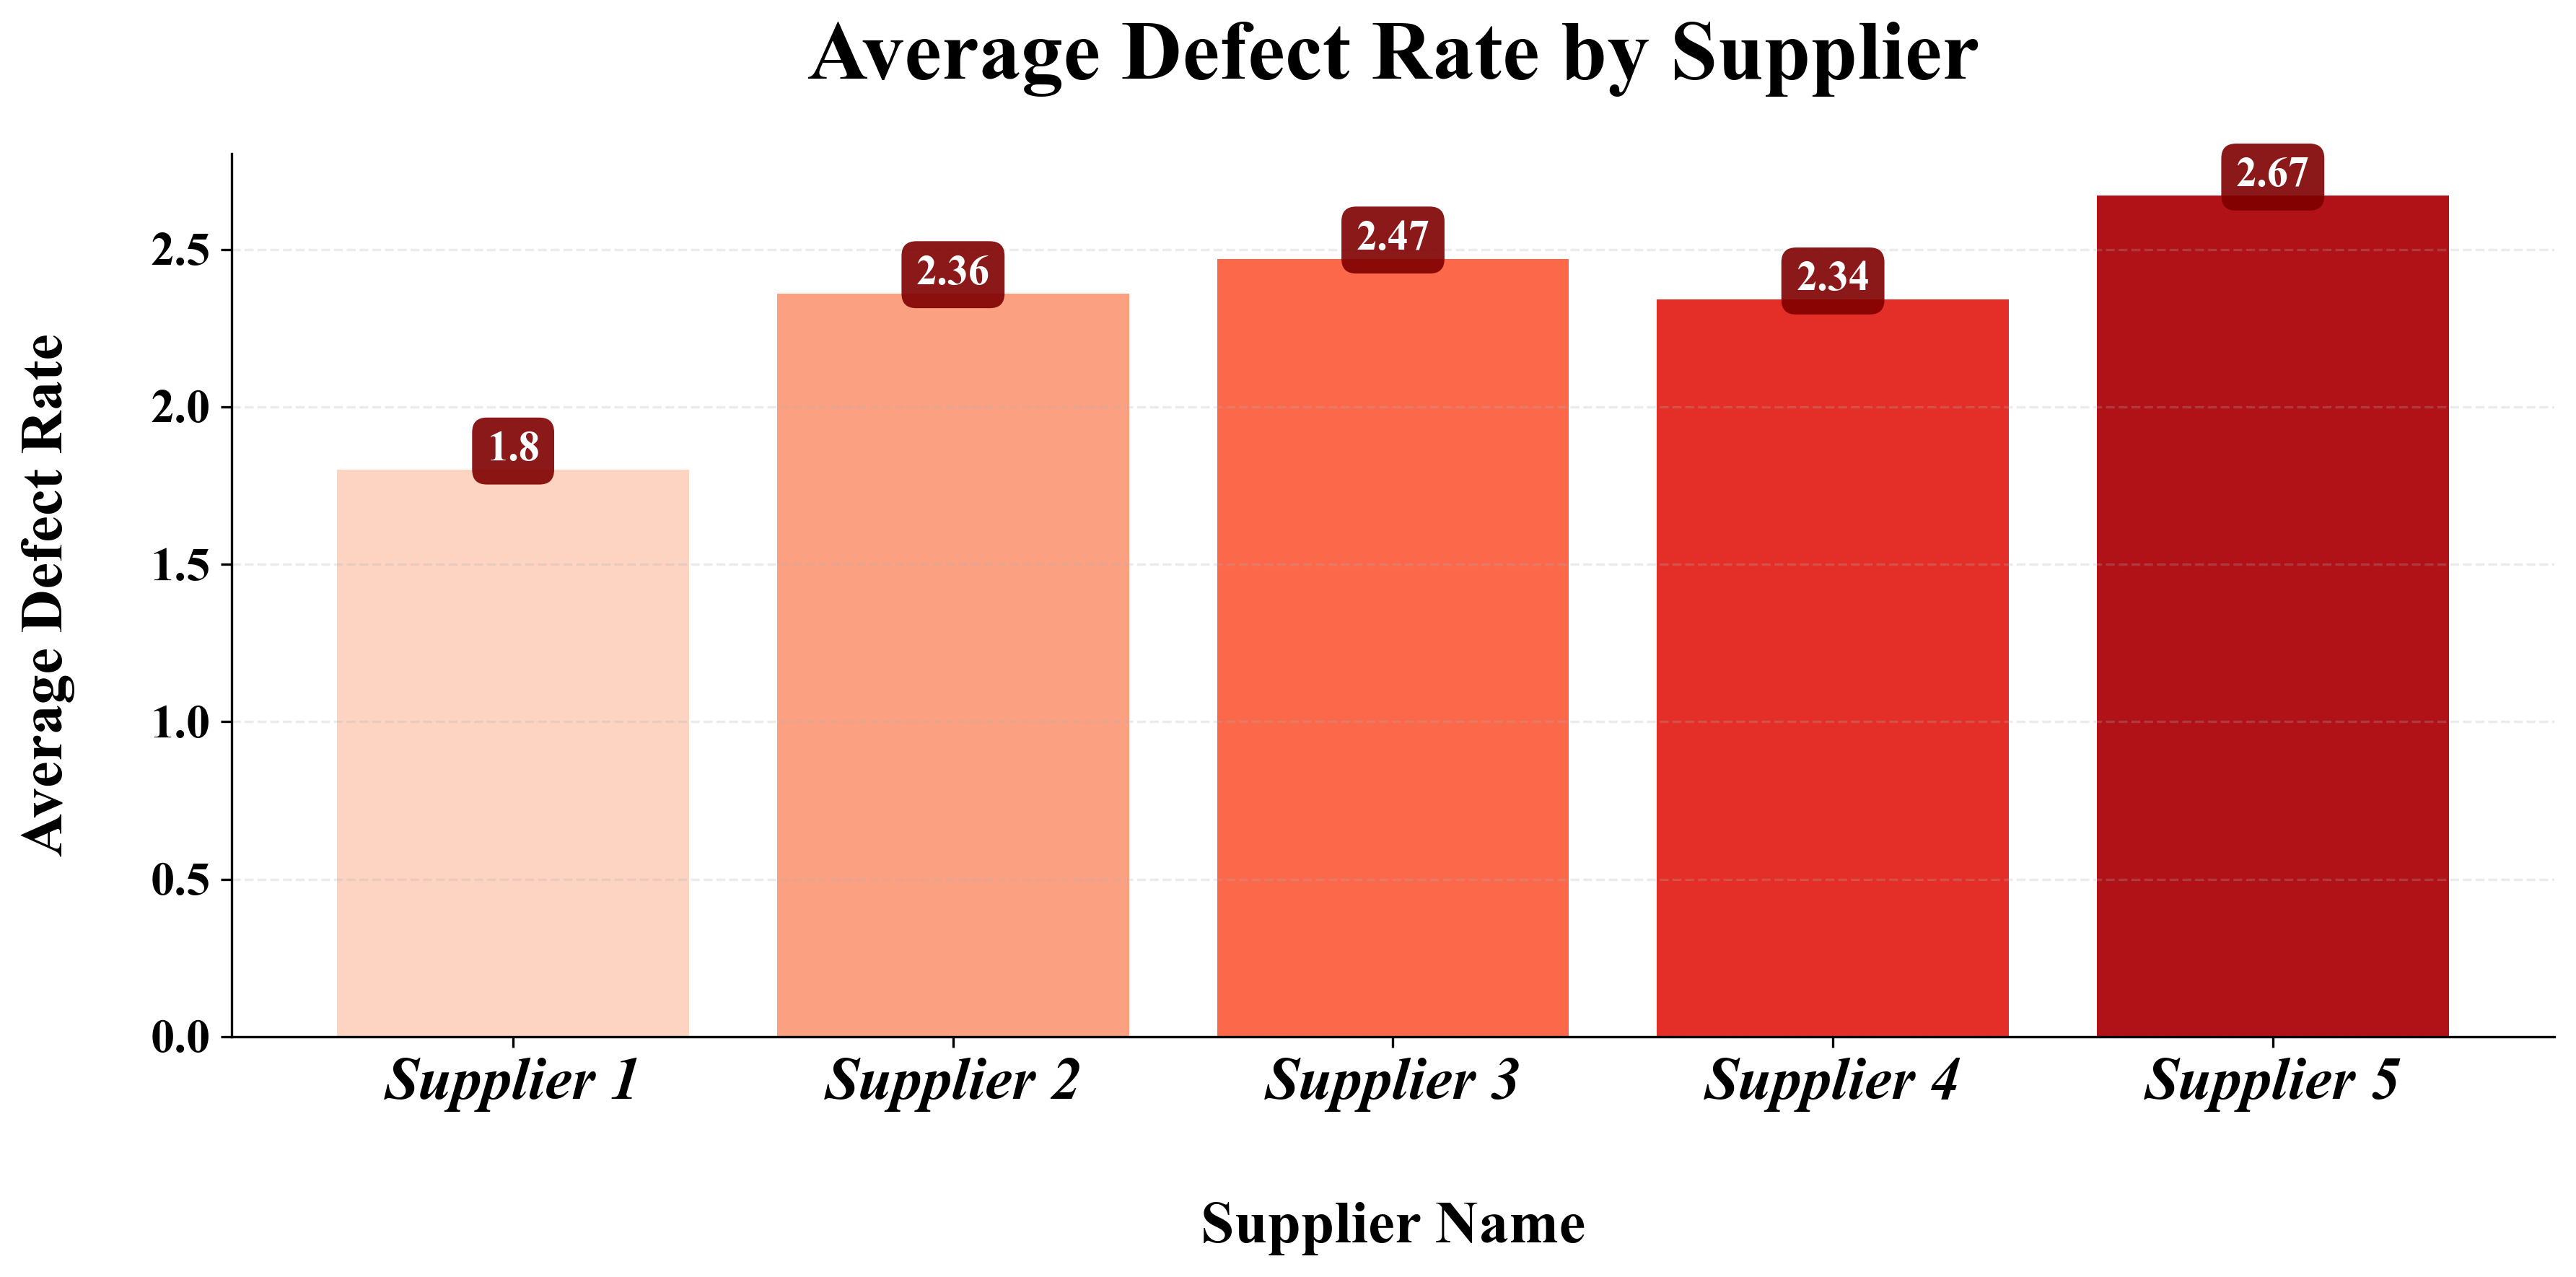

In [33]:
defect_summary = (
    df.groupby("Supplier name", as_index=False)["Defect rates"]
    .mean()
)

defect_summary["Defect rates"] = defect_summary["Defect rates"].round(2)

plt.figure(figsize=(12,6), dpi=300)

colors = sns.color_palette("Reds", n_colors=len(defect_summary))

bars = plt.bar(
    defect_summary["Supplier name"],
    defect_summary["Defect rates"],
    color=colors
)

plt.title(
    "Average Defect Rate by Supplier",
    fontweight="bold",
    pad=25
)

plt.xlabel(
    "Supplier Name",
    fontweight="bold",
    labelpad=30
)

plt.ylabel(
    "Average Defect Rate",
    fontweight="bold",
    labelpad=25
)

plt.xticks(fontweight="bold", style="italic")
plt.yticks(fontweight="bold")

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height}",
        ha="center",
        va="bottom",
        fontsize=14,
        fontweight="bold",
        color="white",
        bbox=dict(
            facecolor="#7f0000",
            edgecolor="none",
            boxstyle="round,pad=0.35",
            alpha=0.9
        )
    )

plt.grid(axis="y", linestyle="--", alpha=0.25)

for spine in ["top", "right"]:
    plt.gca().spines[spine].set_visible(False)

plt.tight_layout()
import os

base_path = os.path.abspath("..")
output_dir = os.path.join(base_path, "output", "image")

os.makedirs(output_dir, exist_ok=True)

file_path = os.path.join(
    output_dir,
    "defect_rate_by_supplier.png"
)

plt.savefig(
    file_path,
    dpi=300,
    bbox_inches="tight",
    facecolor="white"
)

plt.show()



<div style="font-family:'Times New Roman'; line-height:1.8;">

<div style="font-size:24px; font-style:italic; margin-bottom:12px;">
Average Defect Rate by Supplier
</div>

<div style="font-size:20px; margin-left:30px; margin-bottom:10px;">
This chart compares the average defect rate across suppliers.
Defect rate measures the proportion of products that fail quality checks
or require rework.
</div>

<div style="font-size:20px; margin-left:30px; margin-bottom:10px;">
Suppliers with higher defect rates may negatively impact operational
efficiency, increase returns, and raise overall supply chain costs.
In contrast, suppliers with lower defect rates demonstrate better
quality control performance.
</div>

<div style="font-size:20px; margin-left:30px;">
This analysis supports data-driven supplier evaluation by balancing
cost efficiency with product quality considerations.
</div>

</div>


<div style="font-family:'Times New Roman'; line-height:1.8;">

<div style="font-size:28px; font-weight:bold;">
Revenue vs Manufacturing Cost Analysis
</div>

<div style="font-size:24px; font-style:italic; margin-top:10px;">
Revenue and Manufacturing Cost by Product Type
</div>

<div style="font-size:20px; margin-top:10px;">
This section compares total revenue and total manufacturing cost across
different product types. The objective is to evaluate relative profitability
and identify product categories with higher cost-to-revenue ratios.
</div>

</div>


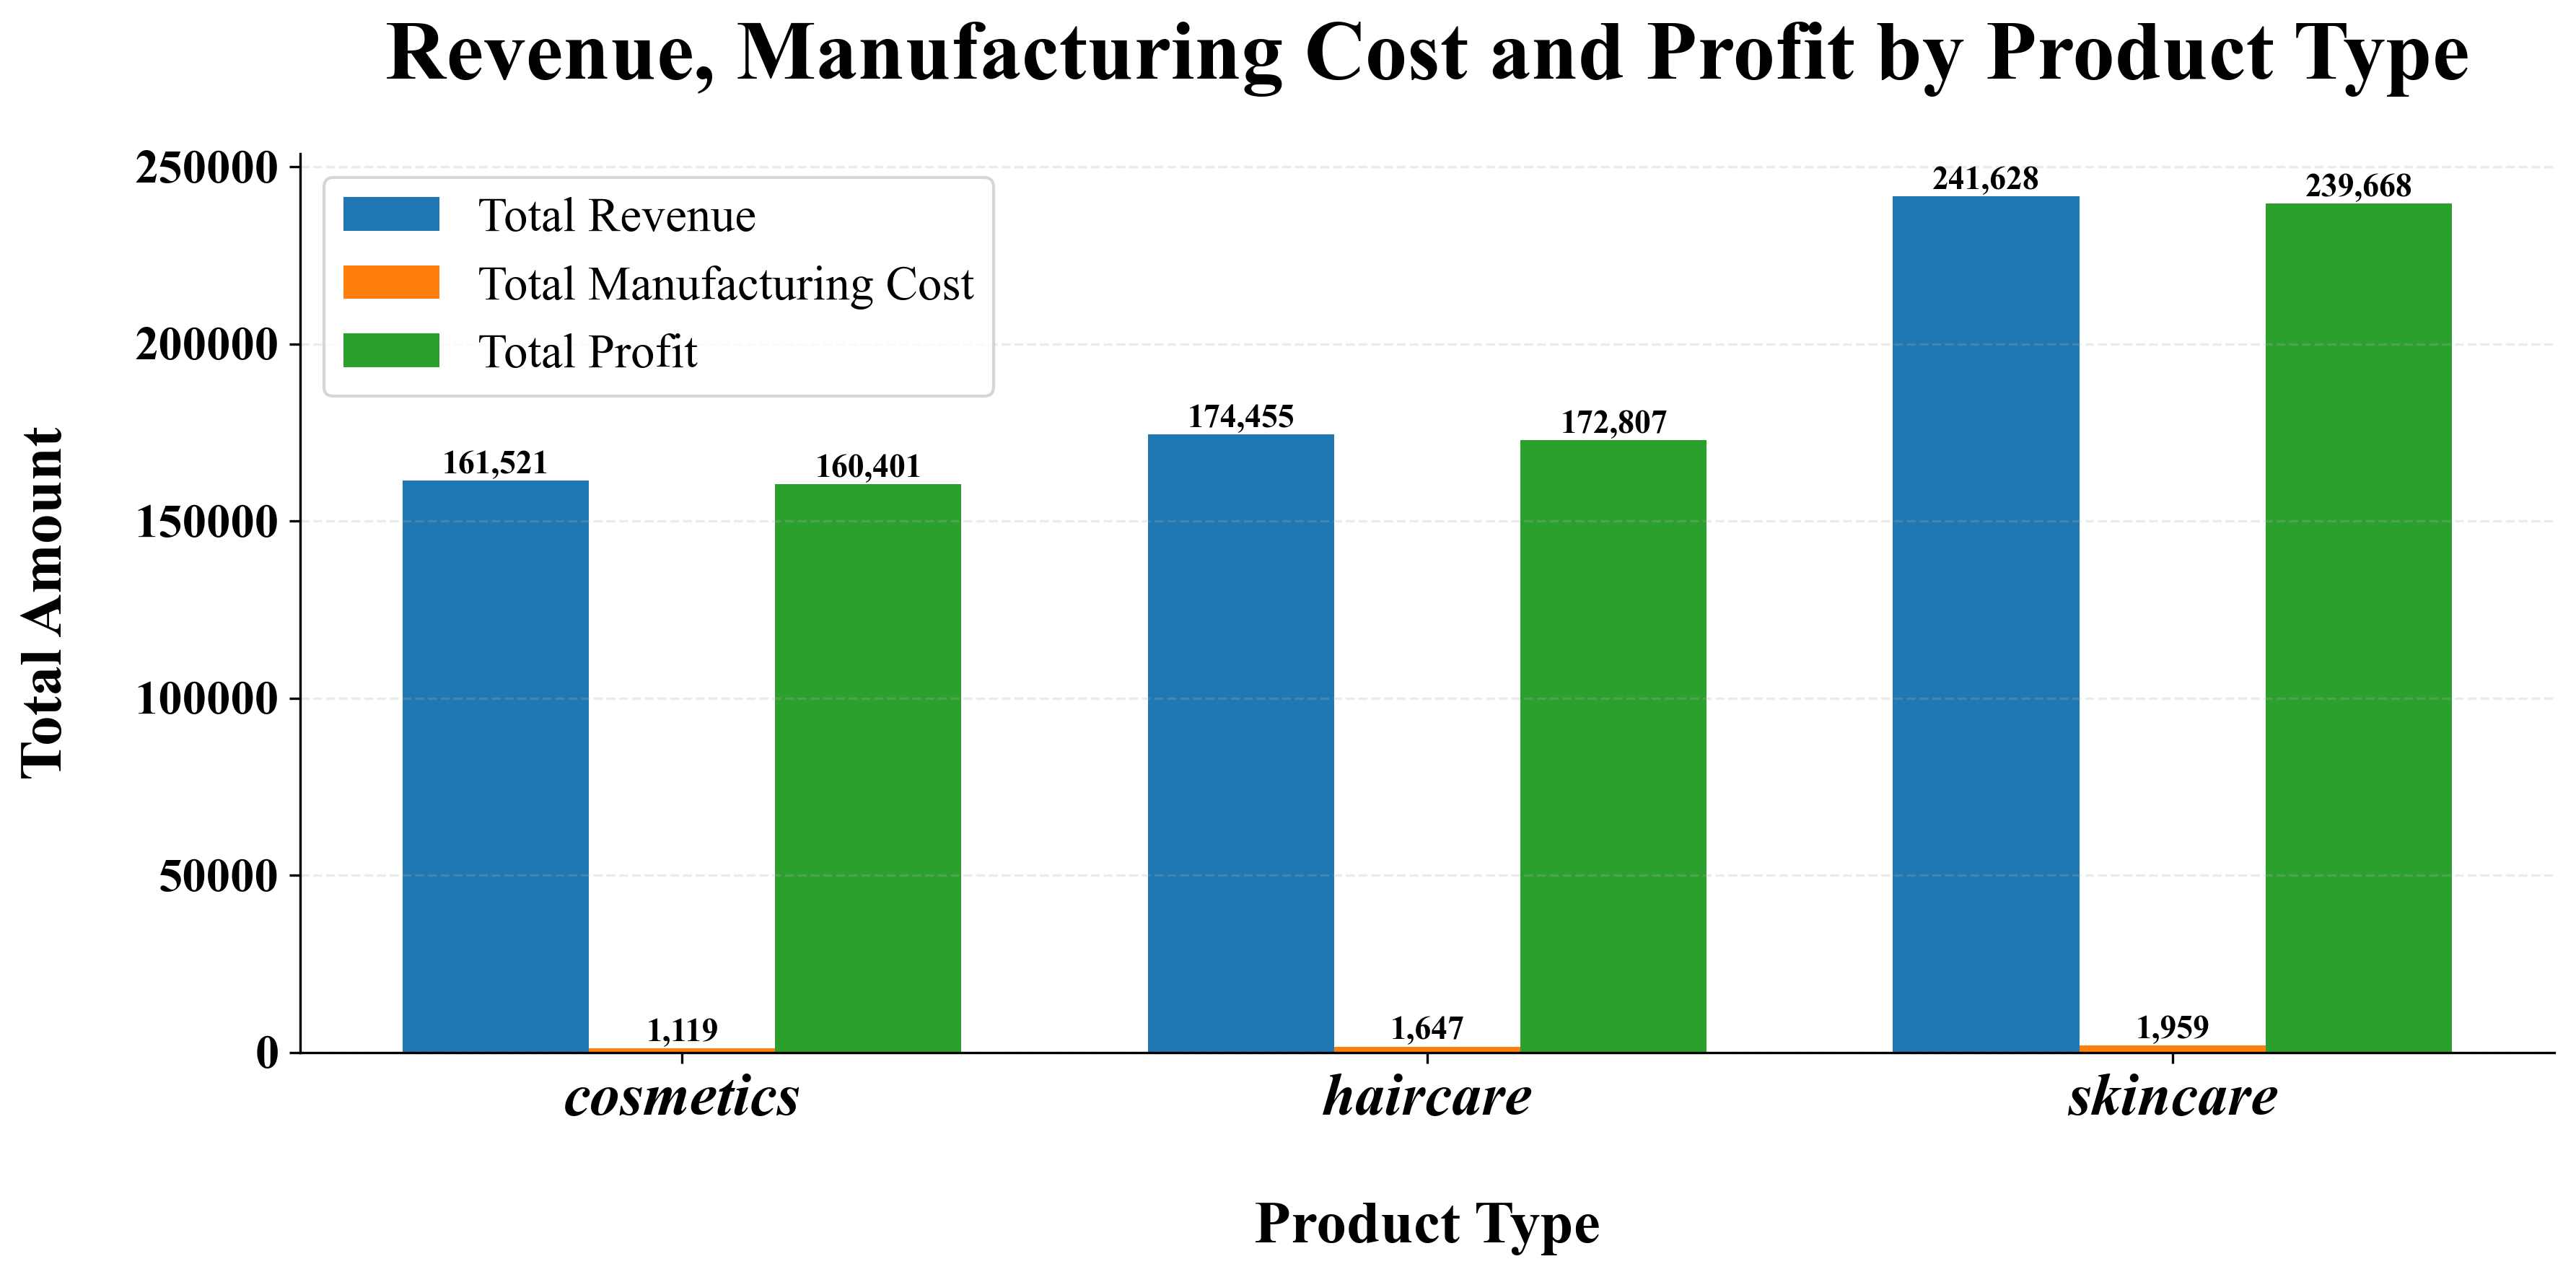

In [44]:
profit_summary = (
    df.groupby("Product type", as_index=False)[
        ["Revenue generated", "Manufacturing costs"]
    ]
    .sum()
)

profit_summary["Profit"] = (
    profit_summary["Revenue generated"] -
    profit_summary["Manufacturing costs"]
)

plt.figure(figsize=(12,6), dpi=300)

x = np.arange(len(profit_summary))
width = 0.25

bars1 = plt.bar(
    x - width,
    profit_summary["Revenue generated"],
    width,
    label="Total Revenue",
    color="#1f77b4"
)

bars2 = plt.bar(
    x,
    profit_summary["Manufacturing costs"],
    width,
    label="Total Manufacturing Cost",
    color="#ff7f0e"
)

bars3 = plt.bar(
    x + width,
    profit_summary["Profit"],
    width,
    label="Total Profit",
    color="#2ca02c"
)

plt.title(
    "Revenue, Manufacturing Cost and Profit by Product Type",
    fontweight="bold",
    pad=25
)

plt.xlabel(
    "Product Type",
    fontweight="bold",
    labelpad=25
)

plt.ylabel(
    "Total Amount",
    fontweight="bold",
    labelpad=20
)

plt.xticks(
    x,
    profit_summary["Product type"],
    fontweight="bold",
    style="italic"
)

plt.yticks(fontweight="bold")

plt.legend()

# adding exact values on bars
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f"{int(height):,}",
            ha="center",
            va="bottom",
            fontsize=11,
            fontweight="bold"
        )

plt.grid(axis="y", linestyle="--", alpha=0.25)

for spine in ["top", "right"]:
    plt.gca().spines[spine].set_visible(False)

plt.tight_layout()

import os

base_path = os.path.abspath("..")
output_dir = os.path.join(base_path, "output", "image")

os.makedirs(output_dir, exist_ok=True)

file_path = os.path.join(
    output_dir,
    "revenue_cost_profit_comparison.png"
)

plt.savefig(
    file_path,
    dpi=300,
    bbox_inches="tight",
    facecolor="white"
)

plt.show()

plt.show()


<div style="font-family:'Times New Roman'; line-height:1.8;">

<div style="font-size:24px; font-style:italic; margin-bottom:12px;">
Revenue, Manufacturing Cost and Profit by Product Type
</div>

<div style="font-size:20px; margin-left:30px; margin-bottom:10px;">
This chart compares total revenue, total manufacturing cost, and derived profit
across the three product categories: cosmetics, haircare, and skincare.
</div>

<div style="font-size:20px; margin-left:30px; margin-bottom:10px;">
For cosmetics, total revenue is 161,521 while total manufacturing cost is 1,119,
resulting in a calculated gross profit of 160,401.
</div>

<div style="font-size:20px; margin-left:30px; margin-bottom:10px;">
For haircare, total revenue amounts to 174,455 with a manufacturing cost of 1,647,
leading to a gross profit of 172,807.
</div>

<div style="font-size:20px; margin-left:30px; margin-bottom:10px;">
For skincare, total revenue is 241,628 and manufacturing cost is 1,959,
resulting in the highest gross profit of 239,668 among all categories.
</div>

<div style="font-size:20px; margin-left:30px;">
The analysis indicates that skincare generates the highest revenue and gross profit,
followed by haircare and cosmetics. It is important to note that the profit shown
represents revenue minus manufacturing cost only and does not include logistics,
marketing, storage, or other operational expenses.
</div>

</div>


<div style="font-family:'Times New Roman'; line-height:1.9;">

<div style="font-size:28px; font-weight:bold;">
Final Exploratory Data Analysis Summary
</div>

<div style="font-size:20px; margin-top:18px; text-align:justify;">

The exploratory data analysis of the supply chain dataset provides a
comprehensive understanding of revenue performance, cost structure,
inventory management, supplier efficiency, and operational dynamics
across different product categories.

Revenue analysis shows that skincare is the highest-performing category,
generating total revenue of 241,628, followed by haircare with 174,455,
and cosmetics with 161,521. This indicates that skincare contributes
the largest share to overall business revenue.

Inventory analysis reveals that average stock levels are generally aligned
with order quantities across product types, suggesting relatively balanced
inventory planning. However, certain categories may require closer monitoring
to prevent potential stockouts during demand fluctuations.

Shipping cost analysis indicates that the average shipping cost across
Carrier A, Carrier B, and Carrier C is approximately 6 units. The distribution
analysis further confirms that cost variation among carriers is minimal,
implying that carrier selection decisions may depend more on service quality
and reliability rather than cost differences.

Manufacturing cost analysis highlights relatively low production costs
compared to revenue. For cosmetics, total manufacturing cost is 1,119;
for haircare, it is 1,647; and for skincare, it is 1,959. When compared
to total revenue, this results in gross profits of 160,401 for cosmetics,
172,807 for haircare, and 239,668 for skincare.

Defect rate analysis indicates variability among suppliers, with some
suppliers exhibiting higher average defect rates than others. This
suggests the need for continuous quality monitoring and supplier
performance evaluation to reduce operational risk.

Lead time analysis demonstrates differences in average lead times across
product types, emphasizing the importance of demand forecasting and
safety stock planning for categories with longer procurement cycles.

Overall, the analysis suggests that skincare is the most profitable
product category based on gross manufacturing margin, while cost and
quality performance vary across suppliers and operational components.
The insights derived from this exploratory analysis provide a strong
foundation for predictive modeling and demand forecasting in the
next phase of the project.

</div>

</div>
